In [1]:
from helpy import HistFile
import hist
import mplhep
mplhep.style.use('ROOT')

import matplotlib.pyplot as plt

In [20]:
f = HistFile('dimuon/hist.root', 'ReducedEaT')
f.keys()

['n_hcal_veto_hits',
 'trigger_hcal_min_cost_strip_layer',
 'ecalrms_hcal_min_cost_strip_layer',
 'trigger_total_ecal_rec_energy',
 'hcalmaxpe_total_ecal_rec_energy',
 'ecalrms_total_ecal_rec_energy']

Text(0.95, 0.95, 'Di-Muon\nTrigger')

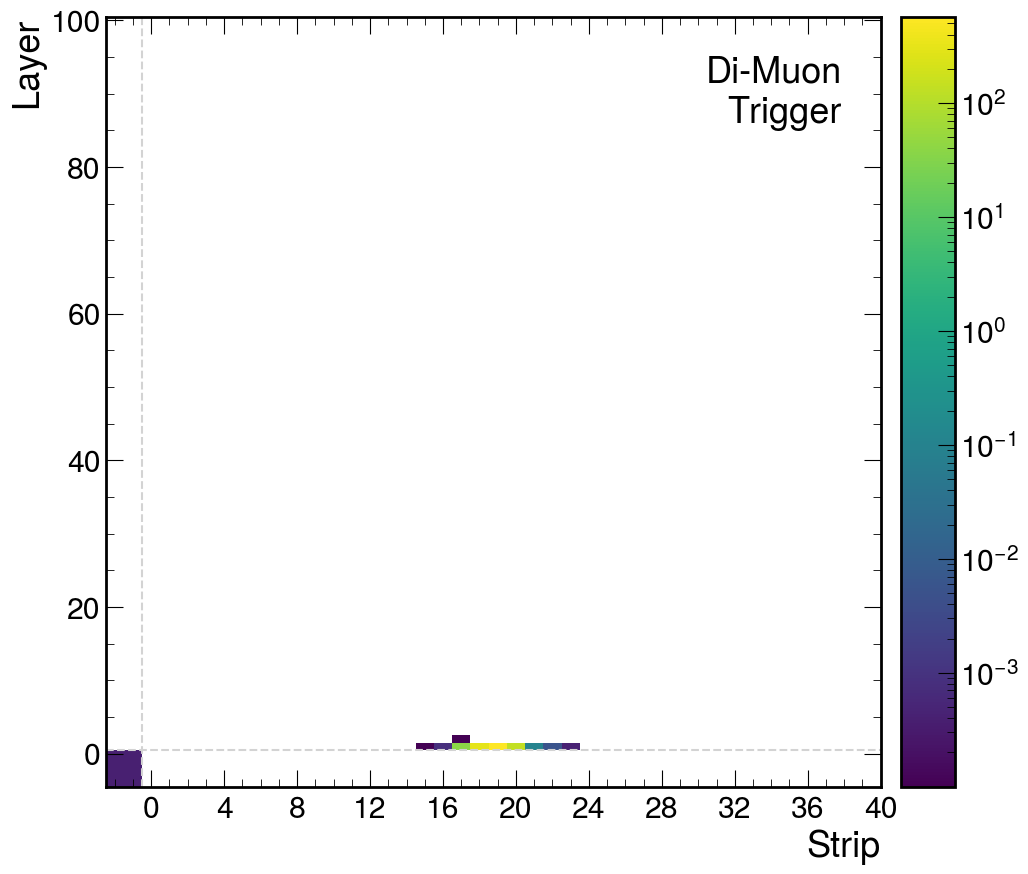

In [24]:
f['trigger_hcal_min_cost_strip_layer'].to_hist().plot(flow='show', norm='log')
plt.xticks(ticks=list(range(0,41,4)))
plt.annotate(
    'Di-Muon\nTrigger',
    xy=(0.95,0.95),
    xycoords='axes fraction',
    va='top',
    ha='right',
)

# f['ecalrms_hcal_min_cost_strip_layer'].to_hist().plot(flow='show', norm='log')
# plt.xticks(ticks=list(range(0,41,4)))
# plt.annotate(
#     'ECal RMS',
#     xy=(0.9,0.9),
#     xycoords='axes fraction',
#     va='top',
#     ha='right',
# )

/export/scratch/users/eichl008/ldmx/eat/reduced/.venv/lib64/python3.12/site-packages/mplhep/utils.py:652: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values(), variances) - self.values())


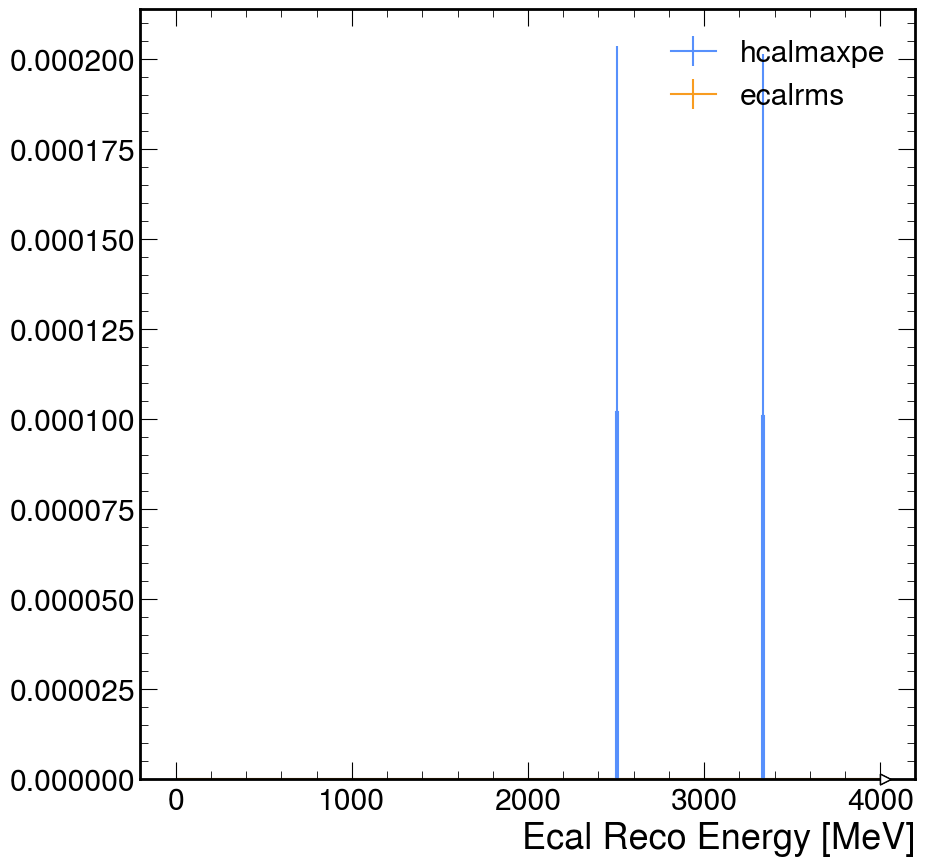

In [25]:
for sel in ['hcalmaxpe','ecalrms']:
    f[f'{sel}_total_ecal_rec_energy'].to_hist().plot(label=sel)
plt.legend()
plt.show()